In [ ]:
pip install datasets==2.14.4 fsspec==2023.6.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2023.6.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64

In [ ]:
 from datasets import load_dataset

# Load the verified working dataset
dataset = load_dataset("frankdarkluo/dailydialog")

# Preview structure
print(dataset)
print(dataset["train"][0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating validation split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.11/dist-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


DatasetDict({
    train: Dataset({
        features: ['context', 'response'],
        num_rows: 60005
    })
    validation: Dataset({
        features: ['context', 'response'],
        num_rows: 6594
    })
    test: Dataset({
        features: ['context', 'response'],
        num_rows: 6955
    })
})
{'context': 'Waiter ! ', 'response': " I'll be with you in a second . Uh ... Yes , ma'am ? "}


In [ ]:
# Auto-Label Responses with Sentiment
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load a pre-trained Twitter sentiment model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

# Annotate the first 5 responses
for i in range(5):
    text = dataset["train"][i]["response"]
    result = classifier(text)[0]
    print(f"Response: {text}")
    print(f"Predicted Sentiment: {result['label']} (score: {result['score']:.2f})")
    print("---")


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Response:  I'll be with you in a second . Uh ... Yes , ma'am ? 
Predicted Sentiment: LABEL_1 (score: 0.78)
---
Response:  This is not what I asked for . I'm afraid . 
Predicted Sentiment: LABEL_0 (score: 0.92)
---
Response:  Oh , I'm so sorry . May I ask what you ordered again ? 
Predicted Sentiment: LABEL_0 (score: 0.72)
---
Response:  Yes . What I ordered is roast beef , not roast beef sandwiches . 
Predicted Sentiment: LABEL_1 (score: 0.68)
---
Response:  Mind your own business . 
Predicted Sentiment: LABEL_1 (score: 0.59)
---


In [ ]:
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

for i in range(5):
    text = dataset["train"][i]["response"]
    result = classifier(text)[0]
    sentiment = label_map[result['label']]
    print(f"Response: {text}")
    print(f"Predicted Sentiment: {sentiment} (score: {result['score']:.2f})")
    print("---")


Response:  I'll be with you in a second . Uh ... Yes , ma'am ? 
Predicted Sentiment: Neutral (score: 0.78)
---
Response:  This is not what I asked for . I'm afraid . 
Predicted Sentiment: Negative (score: 0.92)
---
Response:  Oh , I'm so sorry . May I ask what you ordered again ? 
Predicted Sentiment: Negative (score: 0.72)
---
Response:  Yes . What I ordered is roast beef , not roast beef sandwiches . 
Predicted Sentiment: Neutral (score: 0.68)
---
Response:  Mind your own business . 
Predicted Sentiment: Neutral (score: 0.59)
---


In [ ]:
# Pick a sample from the dataset
sample = dataset["train"][0]

# Extract context and response
context = sample["context"]
response = sample["response"]

# Combine them into one input string
combined_input = f"{context} [SEP] {response}"

print("Combined Input:", combined_input)


Combined Input: Waiter !  [SEP]  I'll be with you in a second . Uh ... Yes , ma'am ? 


In [ ]:
# Load sentiment analysis pipeline
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
classifier = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

# Define label mapping
label_map = {
    "LABEL_0": "Negative",
    "LABEL_1": "Neutral",
    "LABEL_2": "Positive"
}

# Test on first 5 samples using context + response
for i in range(5):
    sample = dataset["train"][i]
    context = sample["context"]
    response = sample["response"]

    combined_input = f"{context} [SEP] {response}"

    result = classifier(combined_input)[0]
    sentiment = label_map[result["label"]]

    print(f"Context: {context}")
    print(f"Response: {response}")
    print(f"Combined: {combined_input}")
    print(f"Predicted Sentiment (with context): {sentiment} (score: {result['score']:.2f})")
    print("---")


Device set to use cpu


Context: Waiter ! 
Response:  I'll be with you in a second . Uh ... Yes , ma'am ? 
Combined: Waiter !  [SEP]  I'll be with you in a second . Uh ... Yes , ma'am ? 
Predicted Sentiment (with context): Neutral (score: 0.83)
---
Context:  I'll be with you in a second . Uh ... Yes , ma'am ? 
Response:  This is not what I asked for . I'm afraid . 
Combined:  I'll be with you in a second . Uh ... Yes , ma'am ?  [SEP]  This is not what I asked for . I'm afraid . 
Predicted Sentiment (with context): Negative (score: 0.82)
---
Context:  This is not what I asked for . I'm afraid . 
Response:  Oh , I'm so sorry . May I ask what you ordered again ? 
Combined:  This is not what I asked for . I'm afraid .  [SEP]  Oh , I'm so sorry . May I ask what you ordered again ? 
Predicted Sentiment (with context): Negative (score: 0.92)
---
Context:  Oh , I'm so sorry . May I ask what you ordered again ? 
Response:  Yes . What I ordered is roast beef , not roast beef sandwiches . 
Combined:  Oh , I'm so sorry .

In [ ]:
# Compare performance — with vs without context
contextual_labels = []
non_contextual_labels = []

for i in range(100):  # Use 100 samples for speed
    sample = dataset["train"][i]
    context = sample["context"]
    response = sample["response"]

    # Without context
    no_context_result = classifier(response)[0]
    no_context_sentiment = label_map[no_context_result["label"]]
    non_contextual_labels.append(no_context_sentiment)

    # With context
    combined_input = f"{context} [SEP] {response}"
    context_result = classifier(combined_input)[0]
    context_sentiment = label_map[context_result["label"]]
    contextual_labels.append(context_sentiment)

    if no_context_sentiment != context_sentiment:
        print(f"--- Sample {i} ---")
        print(f"Context: {context}")
        print(f"Response: {response}")
        print(f"Without Context: {no_context_sentiment}")
        print(f"With Context:    {context_sentiment}")
        print()


--- Sample 3 ---
Context:  Oh , I'm so sorry . May I ask what you ordered again ? 
Response:  Yes . What I ordered is roast beef , not roast beef sandwiches . 
Without Context: Neutral
With Context:    Negative

--- Sample 4 ---
Context: Why are you always staring at Melissa ? Do you like her or something ? 
Response:  Mind your own business . 
Without Context: Neutral
With Context:    Negative

--- Sample 6 ---
Context:  A month . Don't forget to return them by the due date . 
Response:  What if I can't finish them by then ? 
Without Context: Negative
With Context:    Neutral

--- Sample 13 ---
Context:  yes , we can look at the computer and computer menu at the same time . And this will help us understand both better . 
Response:  What should I learn first ? 
Without Context: Neutral
With Context:    Positive

--- Sample 17 ---
Context:  Since summer is coming , I think swimming is a good way for you to do . 
Response:  Are you sure ? 
Without Context: Neutral
With Context:    Positi

In [ ]:
# Compute statistics
# count how often sentiment changes due to context

from collections import Counter

diff_count = sum([c != nc for c, nc in zip(contextual_labels, non_contextual_labels)])
print(f"\nSentiment changed in {diff_count}/100 samples ({diff_count}%) due to context.")



Sentiment changed in 24/100 samples (24%) due to context.


In [ ]:
# Load second sentiment model (fine-tuned BERT on SST-2)
second_model = "distilbert-base-uncased-finetuned-sst-2-english"
second_classifier = pipeline("sentiment-analysis", model=second_model)

# Label mapping for SST-2
label_map_sst = {
    "NEGATIVE": "Negative",
    "POSITIVE": "Positive"
}

# Run on first 5 samples
for i in range(5):
    context = dataset["train"][i]["context"]
    response = dataset["train"][i]["response"]

    combined_input = f"{context} [SEP] {response}"

    result_response_only = second_classifier(response)[0]
    result_combined = second_classifier(combined_input)[0]

    sentiment_response_only = label_map_sst[result_response_only["label"]]
    sentiment_combined = label_map_sst[result_combined["label"]]

    print(f"Sample {i+1}")
    print(f"Context: {context}")
    print(f"Response: {response}")
    print(f"Sentiment (Response Only): {sentiment_response_only} (score: {result_response_only['score']:.2f})")
    print(f"Sentiment (With Context): {sentiment_combined} (score: {result_combined['score']:.2f})")
    print("---")


Device set to use cpu


Sample 1
Context: Waiter ! 
Response:  I'll be with you in a second . Uh ... Yes , ma'am ? 
Sentiment (Response Only): Positive (score: 1.00)
Sentiment (With Context): Positive (score: 1.00)
---
Sample 2
Context:  I'll be with you in a second . Uh ... Yes , ma'am ? 
Response:  This is not what I asked for . I'm afraid . 
Sentiment (Response Only): Negative (score: 1.00)
Sentiment (With Context): Negative (score: 1.00)
---
Sample 3
Context:  This is not what I asked for . I'm afraid . 
Response:  Oh , I'm so sorry . May I ask what you ordered again ? 
Sentiment (Response Only): Negative (score: 1.00)
Sentiment (With Context): Negative (score: 1.00)
---
Sample 4
Context:  Oh , I'm so sorry . May I ask what you ordered again ? 
Response:  Yes . What I ordered is roast beef , not roast beef sandwiches . 
Sentiment (Response Only): Negative (score: 0.71)
Sentiment (With Context): Negative (score: 1.00)
---
Sample 5
Context: Why are you always staring at Melissa ? Do you like her or somethin

In [ ]:
# Track whether sentiment changed due to context (for visualization)
sentiment_changed = []

# Evaluate first 50 samples from the training split
for i in range(50):
    context = dataset["train"][i]["context"]
    response = dataset["train"][i]["response"]
    combined = f"{context} [SEP] {response}"

    # Model 2: DistilBERT SST-2
    result_response = second_classifier(response)[0]
    result_combined = second_classifier(combined)[0]
    sentiment_response = label_map_sst[result_response["label"]]
    sentiment_combined = label_map_sst[result_combined["label"]]

    # Track change
    sentiment_changed.append(sentiment_response != sentiment_combined)


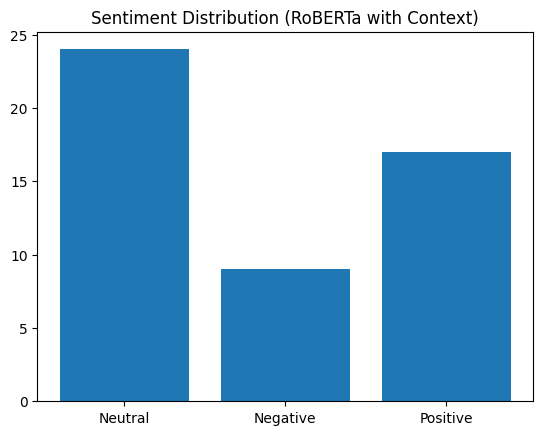

In [ ]:

import matplotlib.pyplot as plt

# Label maps
map_roberta = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}
map_sst = {"NEGATIVE": "Negative", "POSITIVE": "Positive"}

# Collect sentiment counts
roberta_counts = Counter()
sst_counts = Counter()
context_effect = {"Changed": 0, "Unchanged": 0}

# Evaluate first 50 samples
for i in range(50):
    context = dataset["train"][i]["context"]
    response = dataset["train"][i]["response"]
    combined = f"{context} [SEP] {response}"

    # Model 1: RoBERTa
    result1 = classifier(combined)[0]
    sentiment1 = map_roberta[result1["label"]]
    roberta_counts[sentiment1] += 1

    # Model 2: DistilBERT SST-2
    result_response = second_classifier(response)[0]
    result_combined = second_classifier(combined)[0]
    sentiment_response = label_map_sst[result_response["label"]]
    sentiment_combined = label_map_sst[result_combined["label"]]
    sst_counts[sentiment_combined] += 1

    if sentiment_response != sentiment_combined:
        context_effect["Changed"] += 1
    else:
        context_effect["Unchanged"] += 1

# Plot sentiment distributions

fig, ax = plt.subplots()
ax.bar(roberta_counts.keys(), roberta_counts.values())
ax.set_title("Sentiment Distribution (RoBERTa with Context)")
plt.show()


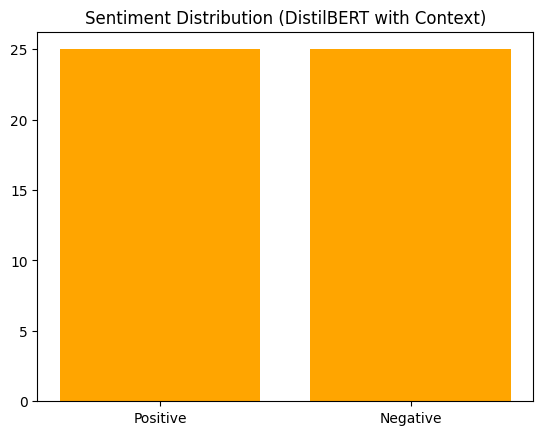

In [ ]:
fig, ax = plt.subplots()
ax.bar(sst_counts.keys(), sst_counts.values(), color="orange")
ax.set_title("Sentiment Distribution (DistilBERT with Context)")
plt.show()


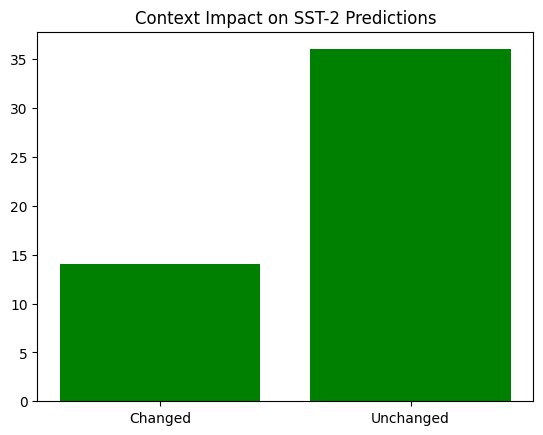

In [ ]:
fig, ax = plt.subplots()
ax.bar(context_effect.keys(), context_effect.values(), color="green")
ax.set_title("Context Impact on SST-2 Predictions")
plt.show()


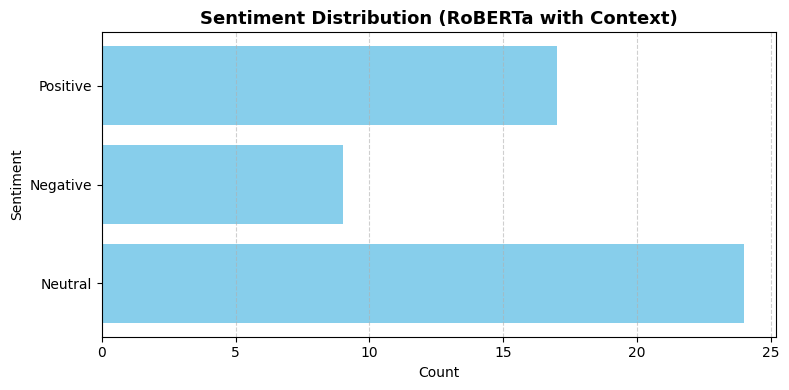

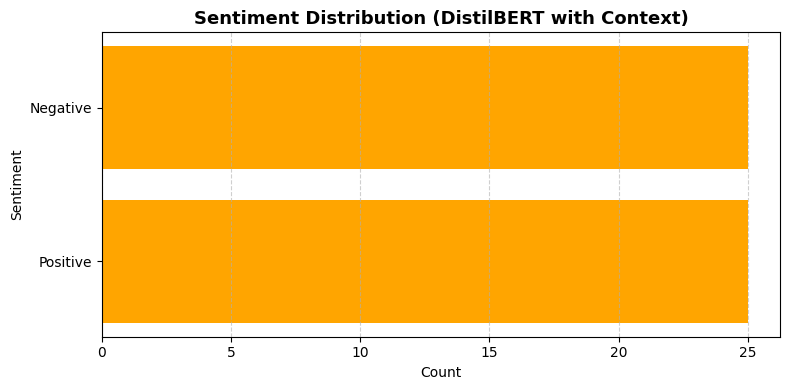

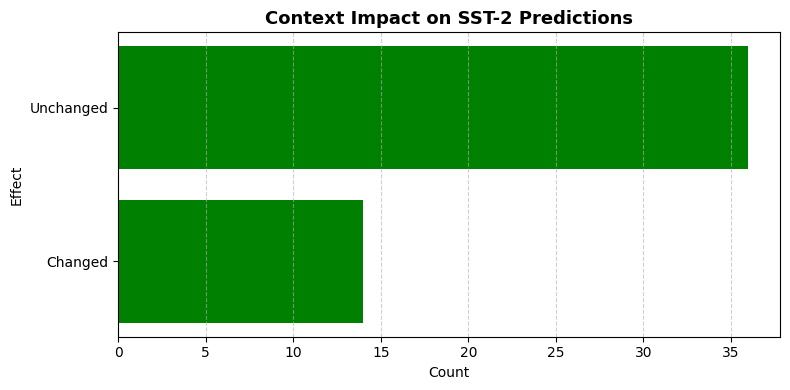

In [ ]:
# --- RoBERTa Sentiment Distribution (horizontal) ---
plt.figure(figsize=(8, 4))
plt.barh(list(roberta_counts.keys()), list(roberta_counts.values()), color="skyblue")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Sentiment Distribution (RoBERTa with Context)", fontsize=13, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- DistilBERT Sentiment Distribution (horizontal) ---
plt.figure(figsize=(8, 4))
plt.barh(list(sst_counts.keys()), list(sst_counts.values()), color="orange")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.title("Sentiment Distribution (DistilBERT with Context)", fontsize=13, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Context Effect Comparison (horizontal) ---
plt.figure(figsize=(8, 4))
plt.barh(list(context_effect.keys()), list(context_effect.values()), color="green")
plt.xlabel("Count")
plt.ylabel("Effect")
plt.title("Context Impact on SST-2 Predictions", fontsize=13, fontweight="bold")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
context_effect = {"Changed": 0, "Unchanged": 0}
...
if sentiment_response != sentiment_combined:
    context_effect["Changed"] += 1
else:
    context_effect["Unchanged"] += 1


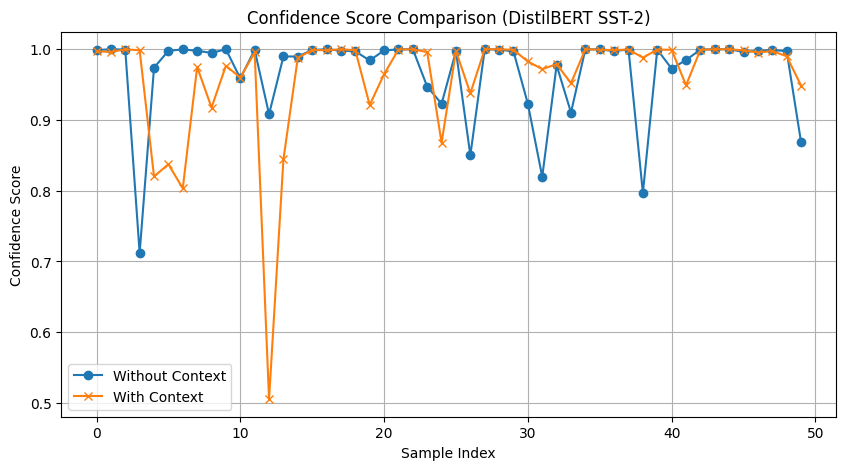

In [ ]:
#Confidence Score Comparison Plot
# To see how confident the model is with vs. without context (for SST-2 model):

response_scores = []
combined_scores = []

for i in range(50):
    context = dataset["train"][i]["context"]
    response = dataset["train"][i]["response"]
    combined = f"{context} [SEP] {response}"

    score_resp = second_classifier(response)[0]["score"]
    score_comb = second_classifier(combined)[0]["score"]

    response_scores.append(score_resp)
    combined_scores.append(score_comb)

# Plot
plt.figure(figsize=(10,5))
plt.plot(response_scores, label="Without Context", marker='o')
plt.plot(combined_scores, label="With Context", marker='x')
plt.title("Confidence Score Comparison (DistilBERT SST-2)")
plt.xlabel("Sample Index")
plt.ylabel("Confidence Score")
plt.legend()
plt.grid(True)
plt.show()


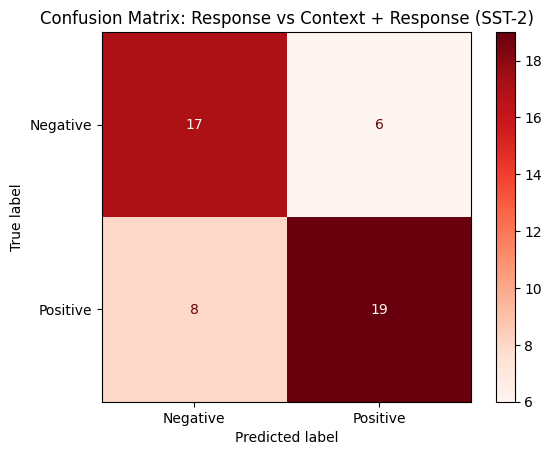

In [ ]:
#Confusion Matrix (Context Shift Categories)
# To quantify how many examples shifted from Negative to Positive, Neutral to Negative, etc.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = []
pred_labels = []

for i in range(50):
    response = dataset["train"][i]["response"]
    context = dataset["train"][i]["context"]
    combined = f"{context} [SEP] {response}"

    res_label = label_map_sst[second_classifier(response)[0]["label"]]
    comb_label = label_map_sst[second_classifier(combined)[0]["label"]]

    true_labels.append(res_label)
    pred_labels.append(comb_label)

cm = confusion_matrix(true_labels, pred_labels, labels=["Negative", "Positive"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Reds")
plt.title("Confusion Matrix: Response vs Context + Response (SST-2)")
plt.show()


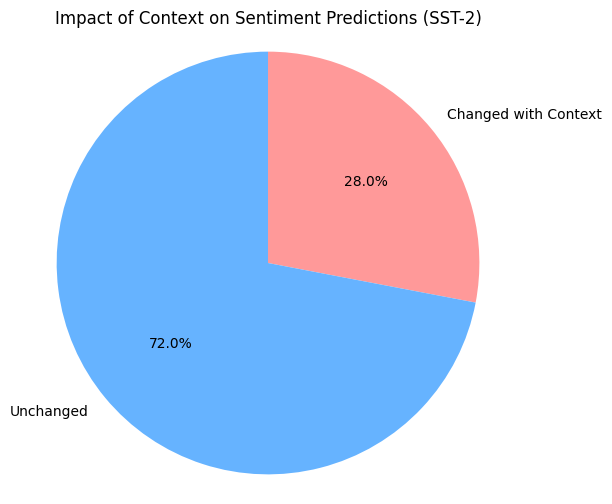

In [ ]:
# Compute counts
changed = sum(sentiment_changed)
unchanged = len(sentiment_changed) - changed

# Labels and sizes
labels = ['Changed with Context', 'Unchanged']
sizes = [changed, unchanged]
colors = ['#ff9999','#66b3ff']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, counterclock=False)
plt.title('Impact of Context on Sentiment Predictions (SST-2)')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

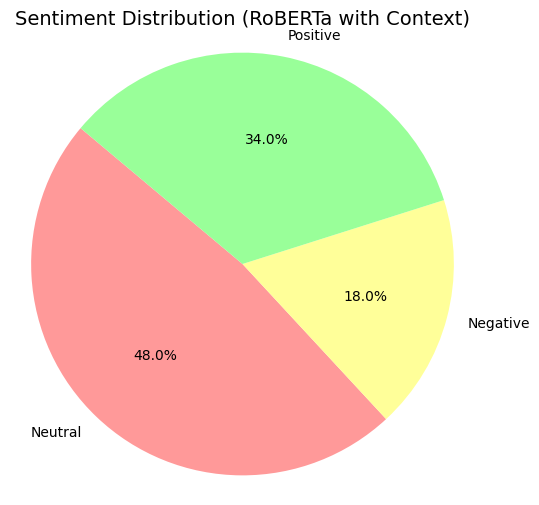

In [ ]:
# Count the number of predicted sentiment classes (with context)
from collections import Counter

sentiment_counts = Counter()

for i in range(50):
    response = dataset["train"][i]["response"]
    context = dataset["train"][i]["context"]
    combined = f"{context} [SEP] {response}"


    result = classifier(combined)[0]
    sentiment = label_map_roberta[result["label"]]
    sentiment_counts[sentiment] += 1

# Plot pie chart of sentiment distribution
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%',
        startangle=140, colors=["#ff9999", "#ffff99", "#99ff99"])
plt.title("Sentiment Distribution (RoBERTa with Context)", fontsize=14)
plt.axis('equal')
plt.show()


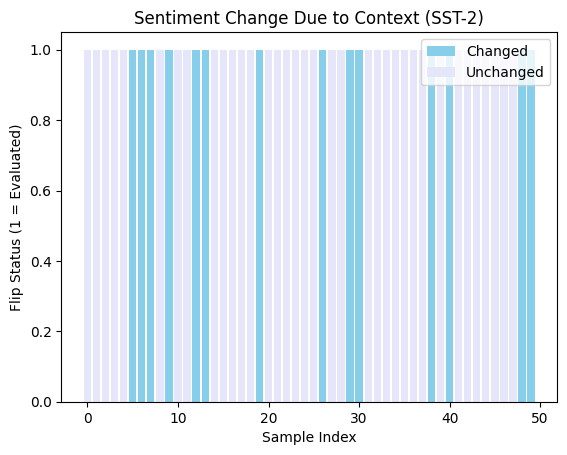

In [ ]:
# Visualize which samples flipped sentiment

flip_indices = [i for i, changed in enumerate(sentiment_changed) if changed]
no_flip_indices = [i for i, changed in enumerate(sentiment_changed) if not changed]

plt.bar(flip_indices, [1]*len(flip_indices), color="skyblue", label="Changed")
plt.bar(no_flip_indices, [1]*len(no_flip_indices), color="lavender", label="Unchanged")
plt.xlabel("Sample Index")
plt.ylabel("Flip Status (1 = Evaluated)")
plt.title("Sentiment Change Due to Context (SST-2)")
plt.legend()
plt.show()


In [1]:
from sklearn.metrics import classification_report

# Example labels (having these from previous pipeline)
# contextual_labels = predictions from RoBERTa with context
# sst_labels = predictions from DistilBERT with context (used as weak ground truth)

# Make sure both lists are the same length and use same label set
labels = ['Negative', 'Neutral', 'Positive']

# Compute evaluation
report = classification_report(sst_labels, contextual_labels, labels=labels, zero_division=0)

print("Evaluation Report (RoBERTa vs DistilBERT as ground truth):\n")
print(report)


NameError: name 'sst_labels' is not defined